# Análisis de Sentimiento de Reviews de Amazon
Este proyecto tiene como objetivo explorar y analizar el sentimiento presente en las reseñas de productos de Amazon, utilizando técnicas de ciencia de datos. A través del análisis del texto de las reseñas, buscaremos identificar las opiniones y emociones de los clientes hacia los productos.

[![Amazon Logo](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Amazon_logo.svg/905px-Amazon_logo.svg.png)](https://www.amazon.com)

# Objetivos del proyecto
1. Limpieza y preparación de datos: depurar el dataset para eliminar duplicados, manejar valores nulos y normalizar formatos.

2. Clasificación de sentimiento: etiquetar las reviews como positivas, neutrales o negativas usando el puntaje dado por los usuarios.

3. Análisis exploratorio: explorar la distribución de ratings, la proporción de sentimientos y las tendencias temporales.

4. Visualizaciones: crear representaciones gráficas, incluyendo nubes de palabras para cada tipo de sentimiento y dashboard interactivo en Tableau.

# Tecnologías y herramientas utilizadas
1. Python: pandas, numpy, matplotlib, seaborn, nltk, wordcloud, scikit-learn.

2. Tableau: story interactiva para presentar los hallazgos clave.

# Visualización de Insights:
Los resultados del análisis y las tendencias identificadas se presentarán de manera clara y atractiva a través de una story en Tableau y un dashboard interactivo en Power BI. Esto permitirá obtener insights valiosos sobre la percepción de los clientes.

El dataset utilizado para este proyecto contiene información detallada sobre las reseñas de Amazon, incluyendo calificaciones, texto de la reseña, información de utilidad y más. A lo largo de este notebook, se detallará el proceso de preparación de los datos, la construcción del modelo de análisis de sentimiento y los pasos para generar las visualizaciones.

# 1. IMPORTAR LIBRERÍAS Y CARGAR DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science EBAC/Datasets Colab/amazon_reviews.csv')
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


# 2. REVISIÓN INICIAL DE DATOS

In [4]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [5]:
# Valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


In [6]:
# Duplicados
print("\nNúmero de duplicados:", df.duplicated().sum())


Número de duplicados: 0


# 3. LIMPIEZA BÁSICA

In [7]:
# Eliminar columna innecesaria
df.drop(columns=["Unnamed: 0"], inplace=True)

# Eliminar duplicados
df.drop_duplicates(inplace=True)

In [8]:
# Eliminar registros sin texto o sin rating
df.dropna(subset=["reviewText", "overall"], inplace=True)

In [9]:
# Convertir fecha a formato datetime
df["reviewTime"] = pd.to_datetime(df["reviewTime"], errors="coerce")

In [10]:
# Revisar tamaño después de limpieza
print("Tamaño después de limpieza:", df.shape)

Tamaño después de limpieza: (4914, 11)


In [11]:
# Confirmar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4914 entries, 0 to 4914
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewerName          4913 non-null   object        
 1   overall               4914 non-null   float64       
 2   reviewText            4914 non-null   object        
 3   reviewTime            4914 non-null   datetime64[ns]
 4   day_diff              4914 non-null   int64         
 5   helpful_yes           4914 non-null   int64         
 6   helpful_no            4914 non-null   int64         
 7   total_vote            4914 non-null   int64         
 8   score_pos_neg_diff    4914 non-null   int64         
 9   score_average_rating  4914 non-null   float64       
 10  wilson_lower_bound    4914 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 460.7+ KB


# 4. ETIQUETADO INICIAL DE SENTIMIENTO

In [12]:
def label_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df["sentiment"] = df["overall"].apply(label_sentiment)

print("\nConteo de sentimiento:")
print(df["sentiment"].value_counts())


Conteo de sentimiento:
sentiment
positive    4448
negative     324
neutral      142
Name: count, dtype: int64


# 5. VISUALIZACIONES INICIALES

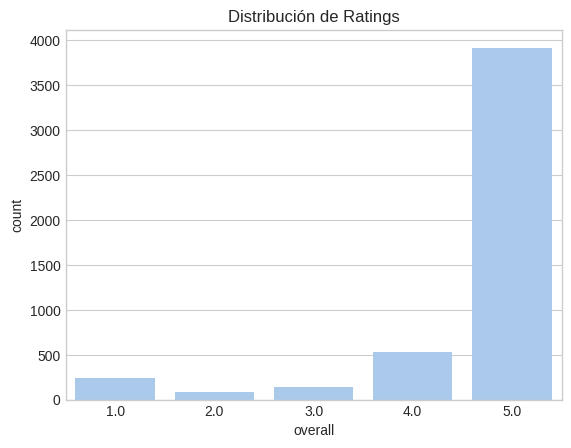

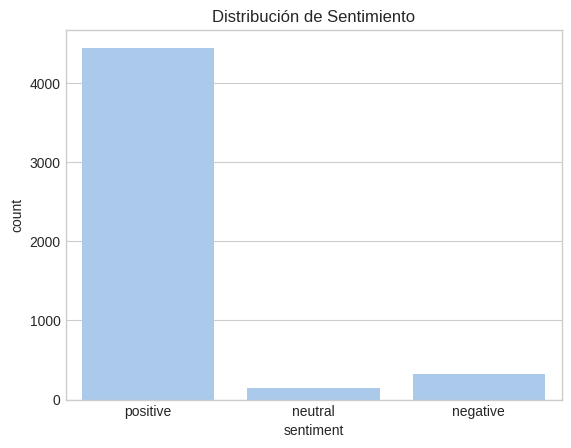

In [13]:
# Distribución de ratings
sns.countplot(data=df, x="overall")
plt.title("Distribución de Ratings")
plt.show()

# Distribución de sentimiento
sns.countplot(data=df, x="sentiment", order=["positive", "neutral", "negative"])
plt.title("Distribución de Sentimiento")
plt.show()

# Código para las nubes de palabras por sentimiento

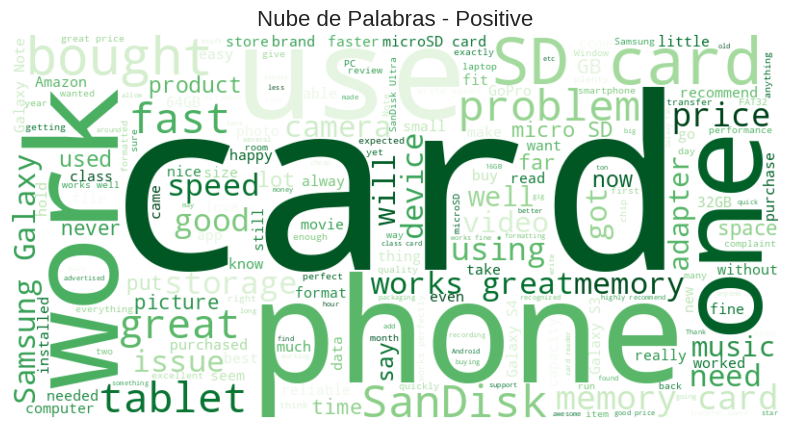

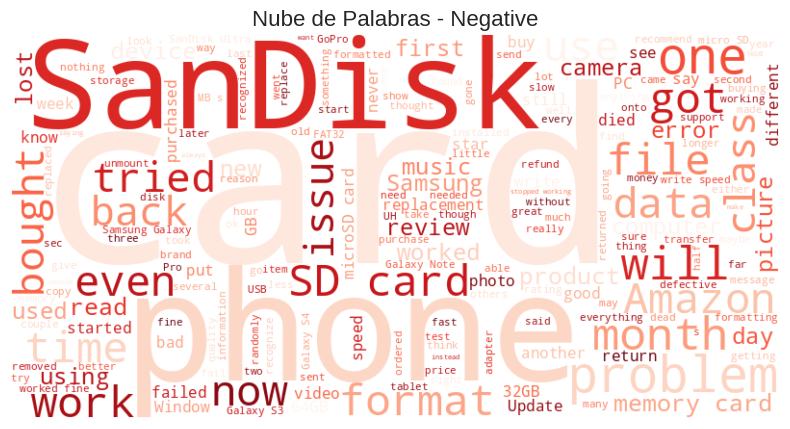

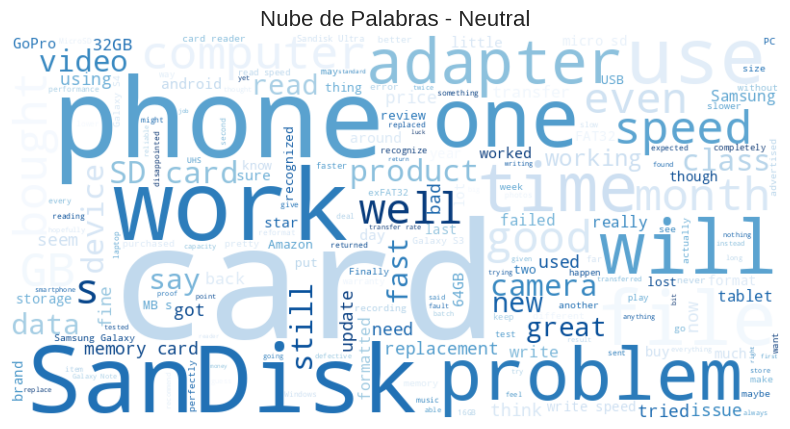

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Función para generar y mostrar la nube
def generar_nube(df, sentimiento, color):
    texto = " ".join(review for review in df[df['sentiment'] == sentimiento]['reviewText'])
    nube = WordCloud(width=800, height=400, background_color="white", colormap=color,
                     max_words=200, contour_color='black', contour_width=1).generate(texto)
    plt.figure(figsize=(10,5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Nube de Palabras - {sentimiento.capitalize()}", fontsize=16)
    plt.show()

# Nube de palabras para reseñas positivas
generar_nube(df, "positive", "Greens")

# Nube de palabras para reseñas negativas
generar_nube(df, "negative", "Reds")

# Nube de palabras para reseñas neutrales
generar_nube(df, "neutral", "Blues")


# Palabras más frecuentes por sentimiento

In [15]:
from collections import Counter
import pandas as pd
import re

def obtener_frecuencias(df, sentimiento, top_n=20):
    # Filtrar por sentimiento y unir todo el texto
    texto = " ".join(df[df['sentiment'] == sentimiento]['reviewText']).lower()
    # Quitar caracteres no alfabéticos
    palabras = re.findall(r'\b[a-z]{3,}\b', texto)
    # Contar frecuencia
    conteo = Counter(palabras)
    return pd.DataFrame(conteo.most_common(top_n), columns=['Palabra', 'Frecuencia'])

# Top palabras por sentimiento
top_pos = obtener_frecuencias(df, "positive")
top_neg = obtener_frecuencias(df, "negative")
top_neu = obtener_frecuencias(df, "neutral")

print("Top palabras - Positivas")
print(top_pos)
print("\nTop palabras - Negativas")
print(top_neg)
print("\nTop palabras - Neutrales")
print(top_neu)

Top palabras - Positivas
    Palabra  Frecuencia
0       the        7255
1       and        6447
2      this        3888
3      card        3632
4       for        3578
5      with        2642
6      have        1811
7      that        1588
8     works        1513
9     phone        1457
10    great        1423
11      you        1317
12      was        1284
13   memory        1236
14      but        1066
15      not        1042
16      use        1002
17  sandisk         988
18      can         973
19      one         915

Top palabras - Negativas
    Palabra  Frecuencia
0       the        1489
1       and         904
2      card         849
3      this         531
4      that         371
5       for         350
6      with         329
7       not         327
8       was         303
9   sandisk         284
10     have         272
11      but         265
12    phone         245
13      had         173
14     from         160
15      you         159
16    cards         151
17    after  

# Limpieza más profunda usando NLTK

In [16]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


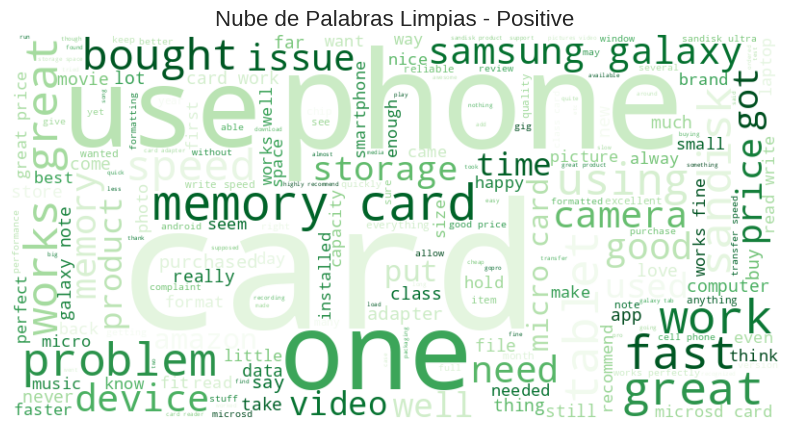

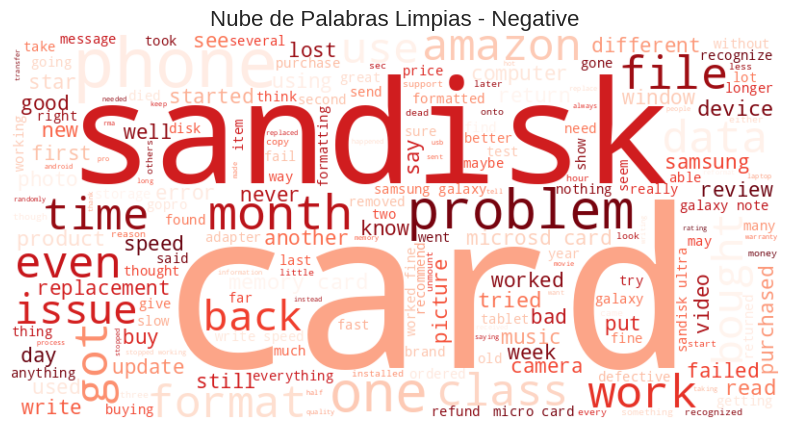

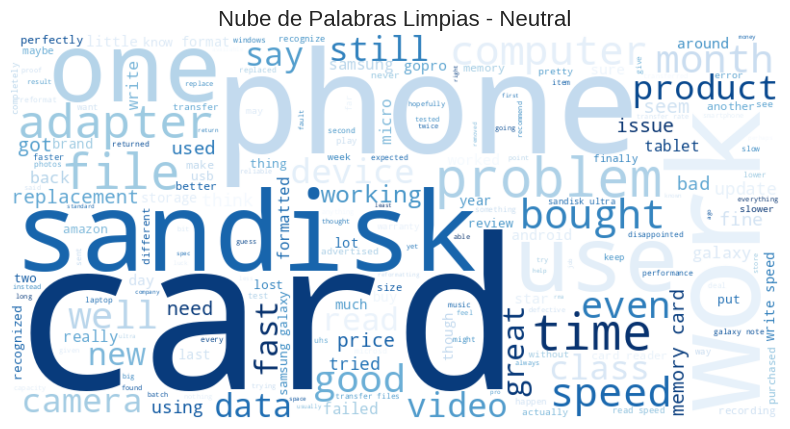

In [17]:
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def limpiar_texto(texto):
    texto = texto.lower()
    # Tokenizar con regex: palabras solo con letras de 3 o más caracteres
    palabras = re.findall(r'\b[a-z]{3,}\b', texto)
    # Filtrar stopwords y puntuación
    palabras_limpias = [word for word in palabras if word not in stop_words]
    return " ".join(palabras_limpias)

df['clean_review'] = df['reviewText'].apply(limpiar_texto)

# Función modificada para la nube de palabras usando texto limpio
def generar_nube_limpia(df, sentimiento, color):
    texto = " ".join(review for review in df[df['sentiment'] == sentimiento]['clean_review'])
    nube = WordCloud(width=800, height=400, background_color="white", colormap=color,
                     max_words=200, contour_color='black', contour_width=1).generate(texto)
    plt.figure(figsize=(10,5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Nube de Palabras Limpias - {sentimiento.capitalize()}", fontsize=16)
    plt.show()

# Generar nubes limpias
generar_nube_limpia(df, "positive", "Greens")
generar_nube_limpia(df, "negative", "Reds")
generar_nube_limpia(df, "neutral", "Blues")

In [18]:
from collections import Counter
import pandas as pd

def obtener_frecuencias_limpias(df, sentimiento, top_n=20):
    texto = " ".join(df[df['sentiment'] == sentimiento]['clean_review'])
    palabras = texto.split()
    conteo = Counter(palabras)
    return pd.DataFrame(conteo.most_common(top_n), columns=['Palabra', 'Frecuencia'])

top_pos = obtener_frecuencias_limpias(df, 'positive')
top_neg = obtener_frecuencias_limpias(df, 'negative')
top_neu = obtener_frecuencias_limpias(df, 'neutral')

print("Palabras más frecuentes - Positivas")
print(top_pos)

print("\nPalabras más frecuentes - Negativas")
print(top_neg)

print("\nPalabras más frecuentes - Neutrales")
print(top_neu)

Palabras más frecuentes - Positivas
    Palabra  Frecuencia
0      card        3632
1     works        1513
2     phone        1457
3     great        1423
4    memory        1236
5       use        1002
6   sandisk         988
7       one         915
8    galaxy         888
9      fast         876
10    price         835
11     good         825
12    cards         744
13  storage         738
14   bought         720
15  samsung         719
16   tablet         642
17     well         627
18    speed         569
19    music         557

Palabras más frecuentes - Negativas
    Palabra  Frecuencia
0      card         849
1   sandisk         284
2     phone         245
3     cards         151
4       one         139
5     would         132
6    months         104
7    memory         104
8    format         102
9   problem         102
10   galaxy         101
11    class         101
12      get         101
13      got         100
14  samsung          96
15     read          91
16    tried    

/tmp/ipython-input-1018457976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_freq, x='Frecuencia', y='Palabra', palette=color)


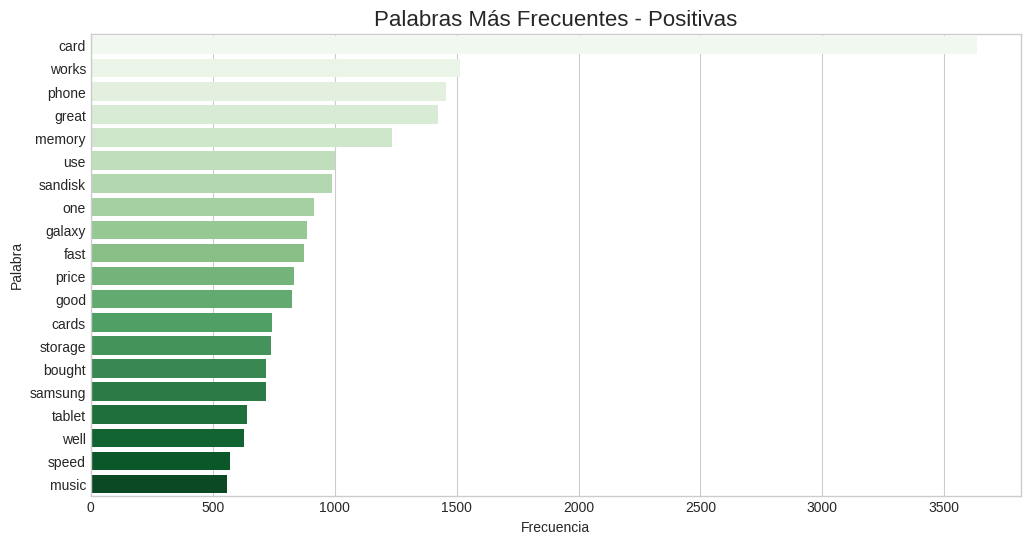

/tmp/ipython-input-1018457976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_freq, x='Frecuencia', y='Palabra', palette=color)


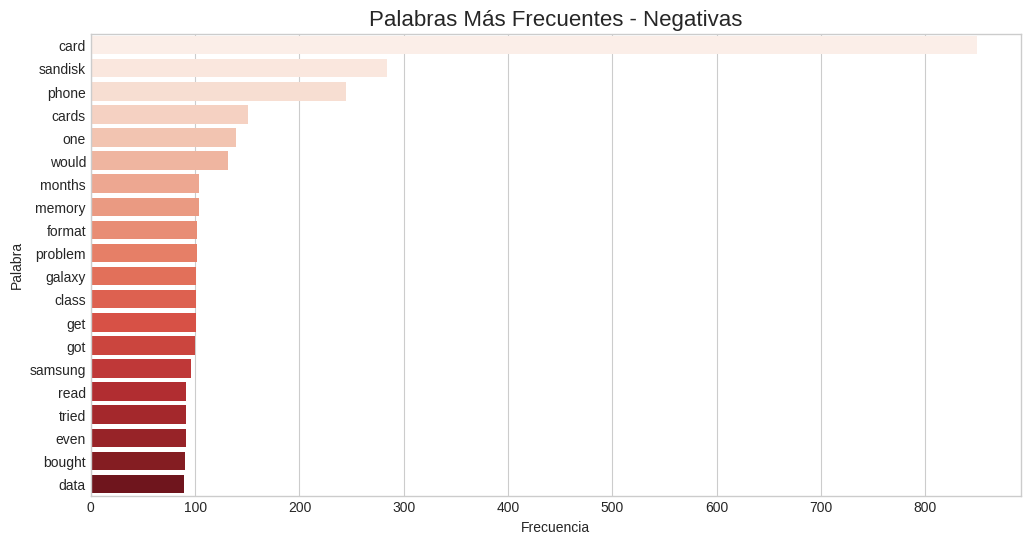

/tmp/ipython-input-1018457976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_freq, x='Frecuencia', y='Palabra', palette=color)


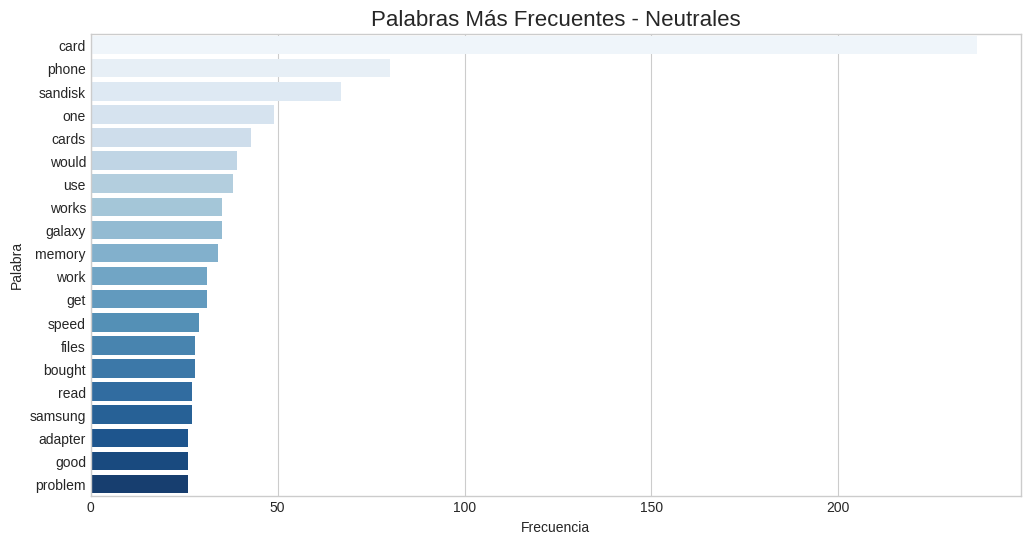

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_frecuencias(df_freq, titulo, color):
    plt.figure(figsize=(12,6))
    sns.barplot(data=df_freq, x='Frecuencia', y='Palabra', palette=color)
    plt.title(titulo, fontsize=16)
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.show()

# Graficar para cada sentimiento
plot_frecuencias(top_pos, 'Palabras Más Frecuentes - Positivas', 'Greens')
plot_frecuencias(top_neg, 'Palabras Más Frecuentes - Negativas', 'Reds')
plot_frecuencias(top_neu, 'Palabras Más Frecuentes - Neutrales', 'Blues')

In [20]:
top_pos.to_csv('top_palabras_positivas.csv', index=False)
top_neg.to_csv('top_palabras_negativas.csv', index=False)
top_neu.to_csv('top_palabras_neutrales.csv', index=False)

# Preparación de datos para Tableau

In [21]:
import pandas as pd

# Seleccionamos columnas relevantes para Tableau
df_final = df[['reviewTime', 'sentiment', 'clean_review', 'overall', 'helpful_yes', 'wilson_lower_bound']].copy()

# Asegurarnos que 'reviewTime' es datetime
df_final['reviewTime'] = pd.to_datetime(df_final['reviewTime'])

# Guardar CSV para Tableau
df_final.to_csv('amazon_reviews_for_tableau.csv', index=False)

print("Dataset exportado correctamente con forma:", df_final.shape)


Dataset exportado correctamente con forma: (4914, 6)


In [22]:
import pandas as pd

# Carga cada CSV
df_positive = pd.read_csv('top_palabras_positivas.csv')
df_negative = pd.read_csv('top_palabras_negativas.csv')
df_neutral = pd.read_csv('top_palabras_neutrales.csv')

# Agrega columna 'sentiment'
df_positive['sentiment'] = 'positive'
df_negative['sentiment'] = 'negative'
df_neutral['sentiment'] = 'neutral'

# Guarda de nuevo con la columna agregada
df_positive.to_csv('top_palabras_positivas_tagged.csv', index=False)
df_negative.to_csv('top_palabras_negativas_tagged.csv', index=False)
df_neutral.to_csv('top_palabras_neutrales_tagged.csv', index=False)